# Logistic Regression exercise

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (15., 12.) # set default size of plots 设置绘图的默认大小 # 显示图像的最大范围
plt.rcParams['image.interpolation'] = 'nearest'# 差值方式，
plt.rcParams['image.cmap'] = 'gray'# 灰度空间

# Some more magic so that the notebook will reload external python modules;更神奇的是，笔记本会重新加载外部的python模块；
%load_ext autoreload
%autoreload 2

In [2]:
# Read the data for you
data = pd.read_csv('./DSVC/datasets/MNIST.csv',header=0).values # change the path by yourself
imgs = data[0::,1::]
labels = data[::,0]

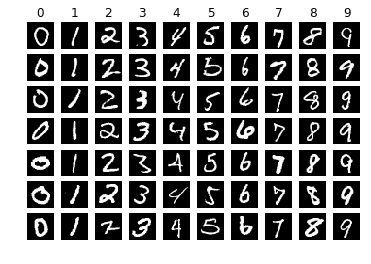

In [3]:
# Visualize some examples from the dataset.从数据集中可视化一些示例。
# We show a few examples of training images from each class.我们展示了每一类上的一些训练图像示例。
classes = range(10)
num_classes = len(classes)
samples_per_class = 7
#对列表的元素位置和元素进行循环，y表示元素位置（0,num_class），cls元素本身
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)#找出标签中y类的位置
    idxs = np.random.choice(idxs, samples_per_class, replace=False)#从中选出我们所需的7个样本
    for i, idx in enumerate(idxs):#对所选的样本的位置和样本所对应的图片在训练集中的位置进行循环
        plt_idx = i * num_classes + y + 1# 在子图中所占位置的计算
        plt.subplot(samples_per_class, num_classes, plt_idx)# 说明要画的子图的编号
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# Binary classification
We use the Logistic Regression to classification handwritten digits wheather it's zero or not. If the handwritten digits is '0' , then the label is 0, otherwise, the label is 1.

In [4]:
# transform the labels标签 to binary
for i in range(len(labels)):
    if labels[i] != 0:
        labels[i] = 1
        
# 2/3 training set
# 1/3 test set
split_index = len(labels) * 2 / 3
X_train = imgs[:int(split_index)]
y_train = labels[:int(split_index)]
X_test = imgs[int(split_index):]
y_test = labels[int(split_index):]

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
print(X_train)
print (X_train.shape)
print (X_test.shape)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
(28000, 785)
(14000, 785)


In [5]:
#X_train_feats = None # choose and extract features
#X_test_feats = None # choose and extract features
#标准化：在机器学习中，我们可能要处理不同种类的资料，例如，音讯和图片上的像素值，这些资料可能是高维度的，资料标准化后会使每个特征中
#的数值平均变为0(将每个特征的值都减掉原始资料中该特征的平均)、标准差变为1，这个方法被广泛的使用在许多机器学习算法中(例如：支持向量机、
#逻辑回归和类神经网络)
X_train_feats=(X_train-np.mean(X_train))/np.std(X_train)#标准差
X_test_feats=(X_test-np.mean(X_test))/np.std(X_test)

MemoryError: 

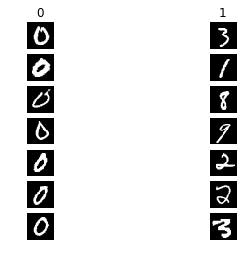

In [6]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = range(2)
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [7]:
from DSVC.classifiers import LogisticRegression

# Start training. 
# You should open DSVC/classifiers/logistic_regression.py and implement the function.
# Then run this cell.

classifier = LogisticRegression()
loss_history = classifier.train(
    X_train_feats, 
    y_train,
    learning_rate = 1e-3,
    num_iters = 500,
    batch_size = 64,
)

NameError: name 'X_train_feats' is not defined

In [ ]:
plt.plot(loss_history)

In [ ]:
y_test_pred = classifier.predict(X_test_feats)
print("The accuracy socre is ", np.mean(y_test == y_test_pred))

you should get the accuracy higher than 96%.

----

### F1-Measure
Notice that, if our model always output '1', totally ignoring the input X, we can get a accuracy 90%.So, in this assignment, accuracy is not efficient enough. 

We will use F1-Measure to evaluate our model.

You may need this:
[F1-Measure](https://baike.baidu.com/item/f-measure/913107?fr=aladdin)

In [ ]:
# Calculate the precision(准确率), recall(召回率) and F1
# important： We should consider label '0' as 'positive' here. 
# That means 'True positive' ==> '(y_test == 0) and (y_test_pred == 0)'

#######Your code here########
for it in range(785):
    if y_test_pred[it] == 0 and y_test[it] == 0:
        TT =TT+1
for it in range(785):
    if y_test_pred[it] == 0 and y_test[it] == 1:
        TF =TF+1
for it in range(785):
    if y_test_pred[it] == 1 and y_test[it] == 0:
        FT =FT+1

precision = TT /(TT + TF)
recall = TT / (TT + FT) 

print(precision)
print(recall)
print('F1:', precision*recall*2/(precision+recall))

you should get the F1 higher than 85%.

# Multiclass classification

Now, we use the Logistic Regression to classification handwritten digits. There are 10 class, from '0' to '9'.


Hint: The method "one vs all" may helpful. [Here is the introduction to "one vs all"](https://msdn.microsoft.com/library/en-us/Dn905887.aspx). 

In [8]:
# Read the data for you
#data = pd.read_csv('C:/用户/Lenovo/DSVC-master1/DSVC-master/assignment3/classwork/DSVC/datasets/MNIST.csv',header=0).values # change the path by yourself
#imgs = data[0::,1::]
#labels = data[::,0]
        
# 2/3 training set
# 1/3 test set
split_index = len(labels) * 2 / 3
X_train = imgs[:int(split_index)]
y_train = labels[:int(split_index)]
X_test = imgs[int(split_index):]
y_test = labels[int(split_index):]

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

print (X_train.shape)
print (X_test.shape)

(28000, 785)
(14000, 785)


In [9]:
#X_train_feats = None # choose and extract features
#X_test_feats = None # choose and extract features
X_train_feats = (X_train - np.mean(X_train)) / np.std(X_train)
X_test_feats = (X_test - np.mean(X_test)) / np.std(X_test)

MemoryError: 

In [ ]:
# Start training. 
# You should update your code in DSVC/classifiers/logistic_regression.py .
# Then run this cell.

classifier = LogisticRegression()
classifier.one_vs_all(
    X_train_feats, 
    y_train,
    learning_rate = 1e-3,
    num_iters = 500,
    batch_size = 64,
)

In [ ]:
# you may change your code in function `predict`
y_test_pred = classifier.one_vs_all_predict(X_test_feats)
print ("The accruacy socre is ", np.mean(y_test == y_test_pred))